In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import get_data_loaders, train, test
from PIL import Image
import pandas as pd

### CIFAR100 Distilled

In [2]:
class CIFAR100_Distilled(Dataset):
    def __init__(self, idx_df, transform):
        self.idx_df = idx_df
        self.transform = transform
    
    def __len__(self):
        return len(self.idx_df)

    def __getitem__(self, index):
        entry = self.idx_df.iloc[index]
        image = self.transform(Image.open(entry.image_path))
        label = entry.label
        return image, torch.tensor(label)

In [3]:
index_file = pd.read_csv('./coreset_index/ipc50_idx.csv')
index_file

,image_path,label
0,./CIFAR100_Coreset/apple/020a5cb9-fd6c-4bc6-b8...,0
1,./CIFAR100_Coreset/apple/04a968b2-3ec6-462c-8f...,0
2,./CIFAR100_Coreset/apple/0cff5c83-a091-4117-a5...,0
3,./CIFAR100_Coreset/apple/0dea64fd-07a0-4e8a-92...,0
4,./CIFAR100_Coreset/apple/10a21297-6965-4518-97...,0
...,...,...
4995,./CIFAR100_Coreset/worm/ecf876bb-10e9-4731-b42...,99
4996,./CIFAR100_Coreset/worm/f20fc518-dd28-42eb-a0c...,99
4997,./CIFAR100_Coreset/worm/f893c524-5be5-49cf-ae6...,99
4998,./CIFAR100_Coreset/worm/fa9ff14c-dc54-457f-82b...,99


In [4]:
image_normalize= transforms.Lambda(lambda img: 2 * img / 255. - 1) # normalize to [-1, 1]
# https://github.com/Lornatang/pytorch-alexnet-cifar100/blob/master/utils/datasets.py
transform = transforms.Compose([
                                transforms.Resize(128),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                # image_normalize,
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                              ])
cifar100_distilled_train = CIFAR100_Distilled(index_file, transform)

cifar100_root = '../cifar100'
cifar100_test = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                transforms.Resize(128),
                                                transforms.ToTensor(),
                                                # image_normalize,
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                                # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                              ]))

In [5]:
batch_size = 64 
train_data_loader, test_data_loader = get_data_loaders(cifar100_distilled_train, cifar100_test, batch_size=batch_size)

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [7]:
import os
model_name = 'vgg11'
dataset = 'cifar100_distilled'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
model = torchvision.models.vgg11(num_classes=100).to(device)

In [8]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100, optimizer='sgd', lr=1e-3)

Epoch 1:   4%|▍         | 3/79 [00:00<00:18,  4.22it/s, loss=4.59]c:\Users\Andrew\envs\CS5340\lib\site-packages\torch\functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Epoch 1: 100%|██████████| 79/79 [00:12<00:00,  6.30it/s, loss=4.64]


epoch: 1 done, loss: 0.07287193089723587
Acc: 0.0172
[0.001]


Epoch 2: 100%|██████████| 79/79 [00:27<00:00,  2.89it/s, loss=4.55]


epoch: 2 done, loss: 0.07252111285924911
Acc: 0.0137
[0.001]


Epoch 3: 100%|██████████| 79/79 [00:13<00:00,  5.84it/s, loss=4.35]


epoch: 3 done, loss: 0.07137234508991241
Acc: 0.0326
[0.001]


Epoch 4: 100%|██████████| 79/79 [00:12<00:00,  6.11it/s, loss=4.34]


epoch: 4 done, loss: 0.06834868341684341
Acc: 0.0349
[0.001]


Epoch 5: 100%|██████████| 79/79 [00:13<00:00,  6.06it/s, loss=3.81]


epoch: 5 done, loss: 0.06523629277944565
Acc: 0.0498
[0.001]


Epoch 6: 100%|██████████| 79/79 [00:12<00:00,  6.39it/s, loss=4.31]


epoch: 6 done, loss: 0.06265560537576675
Acc: 0.0581
[0.001]


Epoch 7: 100%|██████████| 79/79 [00:12<00:00,  6.10it/s, loss=3.34]


epoch: 7 done, loss: 0.05997334420681
Acc: 0.0628
[0.001]


Epoch 8: 100%|██████████| 79/79 [00:12<00:00,  6.33it/s, loss=4.12]


epoch: 8 done, loss: 0.05798046290874481
Acc: 0.073
[0.001]


Epoch 9: 100%|██████████| 79/79 [00:12<00:00,  6.09it/s, loss=3.55]


epoch: 9 done, loss: 0.05643735080957413
Acc: 0.0782
[0.001]


Epoch 10: 100%|██████████| 79/79 [00:12<00:00,  6.36it/s, loss=3.47]


epoch: 10 done, loss: 0.05467257648706436
Acc: 0.0811
[0.001]


Epoch 11: 100%|██████████| 79/79 [00:12<00:00,  6.25it/s, loss=3.11]


epoch: 11 done, loss: 0.053051963448524475
Acc: 0.087
[0.001]


Epoch 12: 100%|██████████| 79/79 [00:12<00:00,  6.18it/s, loss=3.28]


epoch: 12 done, loss: 0.051824767142534256
Acc: 0.0932
[0.001]


Epoch 13: 100%|██████████| 79/79 [00:12<00:00,  6.37it/s, loss=3.28]


epoch: 13 done, loss: 0.05016566812992096
Acc: 0.106
[0.001]


Epoch 14: 100%|██████████| 79/79 [00:13<00:00,  6.04it/s, loss=3.24]


epoch: 14 done, loss: 0.049453701823949814
Acc: 0.1069
[0.001]


Epoch 15: 100%|██████████| 79/79 [00:12<00:00,  6.38it/s, loss=2.35]


epoch: 15 done, loss: 0.04755257070064545
Acc: 0.111
[0.001]


Epoch 16: 100%|██████████| 79/79 [00:13<00:00,  6.06it/s, loss=2.5] 


epoch: 16 done, loss: 0.04658210277557373
Acc: 0.1149
[0.001]


Epoch 17: 100%|██████████| 79/79 [00:12<00:00,  6.36it/s, loss=2.15]


epoch: 17 done, loss: 0.04549450799822807
Acc: 0.1226
[0.001]


Epoch 18: 100%|██████████| 79/79 [00:12<00:00,  6.13it/s, loss=3.31]


epoch: 18 done, loss: 0.0446455143392086
Acc: 0.1243
[0.001]


Epoch 19: 100%|██████████| 79/79 [00:12<00:00,  6.21it/s, loss=2.38]


epoch: 19 done, loss: 0.04350420832633972
Acc: 0.1157
[0.001]


Epoch 20: 100%|██████████| 79/79 [00:12<00:00,  6.32it/s, loss=2.31]


epoch: 20 done, loss: 0.04215027764439583
Acc: 0.1315
[0.001]


Epoch 21: 100%|██████████| 79/79 [00:13<00:00,  6.03it/s, loss=2.84]


epoch: 21 done, loss: 0.0406336672604084
Acc: 0.1438
[0.001]


Epoch 22: 100%|██████████| 79/79 [00:12<00:00,  6.43it/s, loss=2.71]


epoch: 22 done, loss: 0.04021822288632393
Acc: 0.144
[0.001]


Epoch 23: 100%|██████████| 79/79 [00:13<00:00,  6.05it/s, loss=1.35]


epoch: 23 done, loss: 0.03856324404478073
Acc: 0.1488
[0.001]


Epoch 24: 100%|██████████| 79/79 [00:12<00:00,  6.34it/s, loss=2.32]


epoch: 24 done, loss: 0.03779873251914978
Acc: 0.1511
[0.001]


Epoch 25: 100%|██████████| 79/79 [00:13<00:00,  6.05it/s, loss=2.25]


epoch: 25 done, loss: 0.03568114712834358
Acc: 0.1462
[0.001]


Epoch 26: 100%|██████████| 79/79 [00:12<00:00,  6.24it/s, loss=2.18]


epoch: 26 done, loss: 0.03614684194326401
Acc: 0.1578
[0.001]


Epoch 27: 100%|██████████| 79/79 [00:12<00:00,  6.30it/s, loss=1.51]


epoch: 27 done, loss: 0.03552168980240822
Acc: 0.1601
[0.001]


Epoch 28: 100%|██████████| 79/79 [00:13<00:00,  6.05it/s, loss=2.9] 


epoch: 28 done, loss: 0.03452374041080475
Acc: 0.1604
[0.001]


Epoch 29: 100%|██████████| 79/79 [00:12<00:00,  6.43it/s, loss=2.02]


epoch: 29 done, loss: 0.03279699757695198
Acc: 0.1655
[0.001]


Epoch 30: 100%|██████████| 79/79 [00:13<00:00,  6.02it/s, loss=1.15]


epoch: 30 done, loss: 0.03202947974205017
Acc: 0.1734
[0.001]


Epoch 31: 100%|██████████| 79/79 [00:12<00:00,  6.34it/s, loss=1.85]


epoch: 31 done, loss: 0.030965276062488556
Acc: 0.1659
[0.001]


Epoch 32: 100%|██████████| 79/79 [00:12<00:00,  6.13it/s, loss=1.11]


epoch: 32 done, loss: 0.02989003248512745
Acc: 0.169
[0.001]


Epoch 33: 100%|██████████| 79/79 [00:12<00:00,  6.25it/s, loss=1.65]


epoch: 33 done, loss: 0.029583485797047615
Acc: 0.1614
[0.001]


Epoch 34: 100%|██████████| 79/79 [00:12<00:00,  6.33it/s, loss=1.65]


epoch: 34 done, loss: 0.029339464381337166
Acc: 0.1803
[0.001]


Epoch 35: 100%|██████████| 79/79 [00:13<00:00,  5.97it/s, loss=1.56]


epoch: 35 done, loss: 0.028414253145456314
Acc: 0.1748
[0.001]


Epoch 36: 100%|██████████| 79/79 [00:12<00:00,  6.38it/s, loss=1.54]


epoch: 36 done, loss: 0.02722710184752941
Acc: 0.1885
[0.001]


Epoch 37: 100%|██████████| 79/79 [00:12<00:00,  6.09it/s, loss=2.36]


epoch: 37 done, loss: 0.02726643905043602
Acc: 0.1791
[0.001]


Epoch 38: 100%|██████████| 79/79 [00:12<00:00,  6.29it/s, loss=1.96]


epoch: 38 done, loss: 0.025787295773625374
Acc: 0.1815
[0.001]


Epoch 39: 100%|██████████| 79/79 [00:12<00:00,  6.23it/s, loss=1.31]


epoch: 39 done, loss: 0.024902284145355225
Acc: 0.1743
[0.001]


Epoch 40: 100%|██████████| 79/79 [00:12<00:00,  6.09it/s, loss=1.61]


epoch: 40 done, loss: 0.024651717394590378
Acc: 0.1911
[0.001]


Epoch 41: 100%|██████████| 79/79 [00:12<00:00,  6.36it/s, loss=1.71] 


epoch: 41 done, loss: 0.02317092753946781
Acc: 0.1958
[0.001]


Epoch 42: 100%|██████████| 79/79 [00:13<00:00,  6.05it/s, loss=1.64] 


epoch: 42 done, loss: 0.022707462310791016
Acc: 0.192
[0.001]


Epoch 43: 100%|██████████| 79/79 [00:12<00:00,  6.38it/s, loss=1.79] 


epoch: 43 done, loss: 0.023301338776946068
Acc: 0.1853
[0.001]


Epoch 44: 100%|██████████| 79/79 [00:12<00:00,  6.12it/s, loss=1.46] 


epoch: 44 done, loss: 0.021800488233566284
Acc: 0.1902
[0.001]


Epoch 45: 100%|██████████| 79/79 [00:12<00:00,  6.20it/s, loss=1.24] 


epoch: 45 done, loss: 0.021650146692991257
Acc: 0.178
[0.0001]


Epoch 46: 100%|██████████| 79/79 [00:12<00:00,  6.41it/s, loss=0.329]


epoch: 46 done, loss: 0.01888830028474331
Acc: 0.2052
[0.0001]


Epoch 47: 100%|██████████| 79/79 [00:12<00:00,  6.09it/s, loss=0.653]


epoch: 47 done, loss: 0.01666909083724022
Acc: 0.2077
[0.0001]


Epoch 48: 100%|██████████| 79/79 [00:12<00:00,  6.40it/s, loss=1.51] 


epoch: 48 done, loss: 0.015981191769242287
Acc: 0.2038
[0.0001]


Epoch 49: 100%|██████████| 79/79 [00:13<00:00,  6.06it/s, loss=0.57] 


epoch: 49 done, loss: 0.015218725427985191
Acc: 0.2118
[1e-05]


Epoch 50: 100%|██████████| 79/79 [00:12<00:00,  6.25it/s, loss=0.946]


epoch: 50 done, loss: 0.014929362572729588
Acc: 0.2099
[1e-05]


Epoch 51: 100%|██████████| 79/79 [00:12<00:00,  6.28it/s, loss=0.484]


epoch: 51 done, loss: 0.015436619520187378
Acc: 0.2091
[1e-05]


Epoch 52: 100%|██████████| 79/79 [00:12<00:00,  6.09it/s, loss=0.494]


epoch: 52 done, loss: 0.015533387660980225
Acc: 0.2081
[1e-05]


Epoch 53: 100%|██████████| 79/79 [00:12<00:00,  6.40it/s, loss=1.17] 


epoch: 53 done, loss: 0.014042374677956104
Acc: 0.2068
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 79/79 [00:13<00:00,  5.98it/s, loss=0.608]


epoch: 54 done, loss: 0.015071360394358635
Acc: 0.2069
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 79/79 [00:12<00:00,  6.32it/s, loss=2.04] 


epoch: 55 done, loss: 0.015385889448225498
Acc: 0.2066
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 79/79 [00:12<00:00,  6.26it/s, loss=1.95] 


epoch: 56 done, loss: 0.015281910076737404
Acc: 0.2076
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 79/79 [00:13<00:00,  6.04it/s, loss=0.463]


epoch: 57 done, loss: 0.014756322838366032
Acc: 0.2075
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 79/79 [00:12<00:00,  6.44it/s, loss=1.92] 


epoch: 58 done, loss: 0.015048360452055931
Acc: 0.2072
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 79/79 [00:12<00:00,  6.08it/s, loss=0.344]


epoch: 59 done, loss: 0.01459116954356432
Acc: 0.2075
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 79/79 [00:12<00:00,  6.19it/s, loss=1.61] 


epoch: 60 done, loss: 0.01464919839054346
Acc: 0.2079
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 79/79 [00:12<00:00,  6.38it/s, loss=0.804]


epoch: 61 done, loss: 0.014592066407203674
Acc: 0.2072
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 79/79 [00:13<00:00,  6.05it/s, loss=1.57] 


epoch: 62 done, loss: 0.01410869974642992
Acc: 0.2074
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 79/79 [00:12<00:00,  6.37it/s, loss=1.9]  


epoch: 63 done, loss: 0.016101812943816185
Acc: 0.2078
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 79/79 [00:12<00:00,  6.12it/s, loss=0.59] 


epoch: 64 done, loss: 0.013855352066457272
Acc: 0.2076
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 79/79 [00:12<00:00,  6.25it/s, loss=1.03] 


epoch: 65 done, loss: 0.013573870062828064
Acc: 0.2074
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 79/79 [00:12<00:00,  6.28it/s, loss=1.49] 


epoch: 66 done, loss: 0.014191652648150921
Acc: 0.2079
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 79/79 [00:12<00:00,  6.10it/s, loss=0.426]


epoch: 67 done, loss: 0.014382370747625828
Acc: 0.208
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 79/79 [00:12<00:00,  6.39it/s, loss=1.15] 


epoch: 68 done, loss: 0.014812532812356949
Acc: 0.2083
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 79/79 [00:12<00:00,  6.10it/s, loss=1.2]  


epoch: 69 done, loss: 0.014419985935091972
Acc: 0.2077
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 79/79 [00:12<00:00,  6.16it/s, loss=0.939]


epoch: 70 done, loss: 0.014201958663761616
Acc: 0.2078
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 79/79 [00:11<00:00,  6.59it/s, loss=0.66] 


epoch: 71 done, loss: 0.014878799207508564
Acc: 0.2081
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 79/79 [00:10<00:00,  7.30it/s, loss=1.43] 


epoch: 72 done, loss: 0.014912166632711887
Acc: 0.2081
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 79/79 [00:10<00:00,  7.32it/s, loss=0.792]


epoch: 73 done, loss: 0.014788334257900715
Acc: 0.2084
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 79/79 [00:10<00:00,  7.34it/s, loss=1.23] 


epoch: 74 done, loss: 0.015505509451031685
Acc: 0.2085
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 79/79 [00:10<00:00,  7.32it/s, loss=0.364]


epoch: 75 done, loss: 0.015100140124559402
Acc: 0.2083
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 79/79 [00:10<00:00,  7.35it/s, loss=0.843]


epoch: 76 done, loss: 0.014345267787575722
Acc: 0.2078
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 79/79 [00:10<00:00,  7.37it/s, loss=0.549]


epoch: 77 done, loss: 0.014963970519602299
Acc: 0.2076
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 79/79 [00:10<00:00,  7.36it/s, loss=0.692]


epoch: 78 done, loss: 0.014659772627055645
Acc: 0.2076
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 79/79 [00:10<00:00,  7.33it/s, loss=1.51] 


epoch: 79 done, loss: 0.015529151074588299
Acc: 0.2075
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 79/79 [00:10<00:00,  7.33it/s, loss=0.604]


epoch: 80 done, loss: 0.014628640376031399
Acc: 0.2071
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 79/79 [00:10<00:00,  7.32it/s, loss=0.534]


epoch: 81 done, loss: 0.015319593250751495
Acc: 0.2073
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 79/79 [00:10<00:00,  7.35it/s, loss=0.795]


epoch: 82 done, loss: 0.01503837388008833
Acc: 0.2072
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 79/79 [00:10<00:00,  7.32it/s, loss=0.833]


epoch: 83 done, loss: 0.013983083888888359
Acc: 0.2074
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 79/79 [00:10<00:00,  7.32it/s, loss=0.669]


epoch: 84 done, loss: 0.01460533868521452
Acc: 0.2069
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 79/79 [00:10<00:00,  7.34it/s, loss=0.311]


epoch: 85 done, loss: 0.014207789674401283
Acc: 0.207
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 79/79 [00:10<00:00,  7.35it/s, loss=0.578]


epoch: 86 done, loss: 0.015084205195307732
Acc: 0.207
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 79/79 [00:10<00:00,  7.32it/s, loss=0.67] 


epoch: 87 done, loss: 0.015093252062797546
Acc: 0.2072
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 79/79 [00:10<00:00,  7.35it/s, loss=0.795]


epoch: 88 done, loss: 0.01560013648122549
Acc: 0.2073
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 79/79 [00:10<00:00,  7.33it/s, loss=1.43] 


epoch: 89 done, loss: 0.01513285469263792
Acc: 0.2073
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 79/79 [00:10<00:00,  7.32it/s, loss=1.2]  


epoch: 90 done, loss: 0.014578690752387047
Acc: 0.2072
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 79/79 [00:10<00:00,  7.33it/s, loss=0.443]


epoch: 91 done, loss: 0.014413755387067795
Acc: 0.2067
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 79/79 [00:10<00:00,  7.32it/s, loss=0.79] 


epoch: 92 done, loss: 0.014500207267701626
Acc: 0.2068
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 79/79 [00:10<00:00,  7.32it/s, loss=1.38] 


epoch: 93 done, loss: 0.015092984773218632
Acc: 0.2069
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 79/79 [00:10<00:00,  7.35it/s, loss=0.545]


epoch: 94 done, loss: 0.014363334514200687
Acc: 0.2069
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 79/79 [00:10<00:00,  7.34it/s, loss=1.97] 


epoch: 95 done, loss: 0.014879394322633743
Acc: 0.2072
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 79/79 [00:10<00:00,  7.32it/s, loss=1.38] 


epoch: 96 done, loss: 0.015089059248566628
Acc: 0.2067
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 79/79 [00:10<00:00,  7.36it/s, loss=0.703]


epoch: 97 done, loss: 0.01503516174852848
Acc: 0.2069
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 79/79 [00:10<00:00,  7.27it/s, loss=0.251]


epoch: 98 done, loss: 0.014174189418554306
Acc: 0.2072
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 79/79 [00:10<00:00,  7.28it/s, loss=0.89] 


epoch: 99 done, loss: 0.014516985975205898
Acc: 0.207
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 79/79 [00:10<00:00,  7.31it/s, loss=0.634]


epoch: 100 done, loss: 0.015099410898983479
Acc: 0.2067
[1.0000000000000002e-06]
Time taken: 2385.916456 seconds


In [9]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.2118, tensor(0.0556, device='cuda:0'))

<AxesSubplot: >

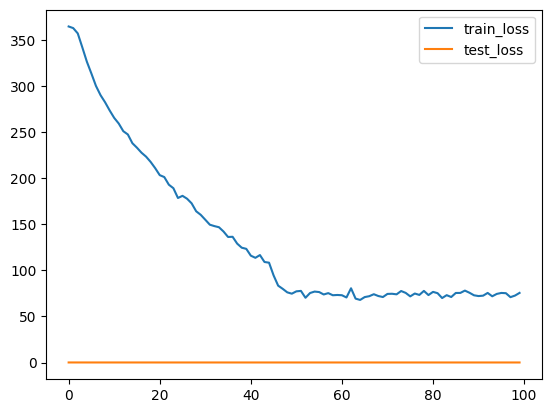

In [10]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])